# **All Activation Functions in Deep Learning**

### **Activation function**

An activation function decides whether a neuron should be “active” or not.

**In very simple words:**

It tells the model how much information should pass to the next layer.

**Why do we use activation functions?**

**Without an activation function:**

*   A neural network would behave like a simple linear equation (**f(x)= wx + b**).
*   No matter how many layers you add, it cannot learn complex patterns.



**With an activation function:**

*   The model can learn curves, shapes, images, text, speech

*   It adds non-linearity, which is essential for deep learning

**Simple example:**

Think of a switch:

*   If input is important → turn ON

*   If input is not important → turn OFF or reduce it

Activation function works like that switch.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt



# **01, Linear Activation Function**

$$
f(x) = ax + b
$$


In [2]:
# Linear Activation function (identity function)
def linear_activation(x):
  return x

In [3]:
linear_nn = nn.Identity() # No transformation , input = output

# **02, Thersold Activation Function**

In [4]:
# Thersold Activation Fucntion
def thersold_Activation(x, thersold=0.5, value=0):
  return torch.where(x > thersold , x,  torch.tensor(value, dtype= x.dtype))

In [5]:
# thersold Funtion

thersold_nn = nn.Threshold(threshold=0.5, value=0)

# Thersold function
#thersold_f = F.threshold(x, threshold=0.5, value=0)

# **03, Sigmoid Avtivation Function**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$


In [6]:
# Sigmoid Activation Function
def sigmoid_activation(x):
  return 1/(1+ torch.exp(-x))

In [7]:
# nn: Applies sigmoid Element-wise
sigmoid_nn =  nn.Sigmoid() # No parameters

# F : Functional version of sigmoid
# sigmoid_f = F.sigmoid(x)

# **04, Tanh Activation Function**

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{\,e^{x} + e^{-x}\,}
$$


In [8]:
# Tanh Activation Function from Scratch
def tanh_activation(x):
  return (torch.exp(x) - torch.exp(-x)/ torch.exp(x) + torch.exp(-x))

# Using nn Module Element-wise
tanh_nn = nn.Tanh()

# Using F Function
# tanh_f = F.tanh(x)

# **05, Softmax Activation Function**

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$



$$
\text{softmax}(z) =
\left[
\frac{e^{z_1}}{\sum_{j=1}^{K} e^{z_j}},\
\frac{e^{z_2}}{\sum_{j=1}^{K} e^{z_j}},\
\ldots,\
\frac{e^{z_K}}{\sum_{j=1}^{K} e^{z_j}}
\right]
$$




In [9]:
# Softmax Activation Function from Scratch
def softmax_activation(x):
  exp_x = torch.exp(x -  torch.max(x)) # For Numerical Statbility
  return (torch.exp_x/ torch.sum(torch.exp_x, dim=-1, keepdim=True))


# Using nn Module
softmax_nn = nn.Softmax(dim=-1)

# Using F function
# softmax_f = F.softmax(x, dim=-1)

# **06, RelU Activation Function**

$$
\text{ReLU}(x) = \max(0, x)
$$


$$
\text{ReLU}'(x) =
\begin{cases}
1, & x > 0 \\
0, & x \le 0
\end{cases}
$$

In [10]:
# ReLU function
x= torch.tensor(2.)
def relu(x):
    return torch.maximum(torch.tensor(0.), x)

# ReLU derivative
def relu_derivative(x):
    return torch.where(x > torch.tensor(0.), torch.tensor(1.), torch.tensor(0.))


# using nn Module
relu_nn = nn.ReLU()

# Using F Function
relu_f = F.relu(x, inplace=False)



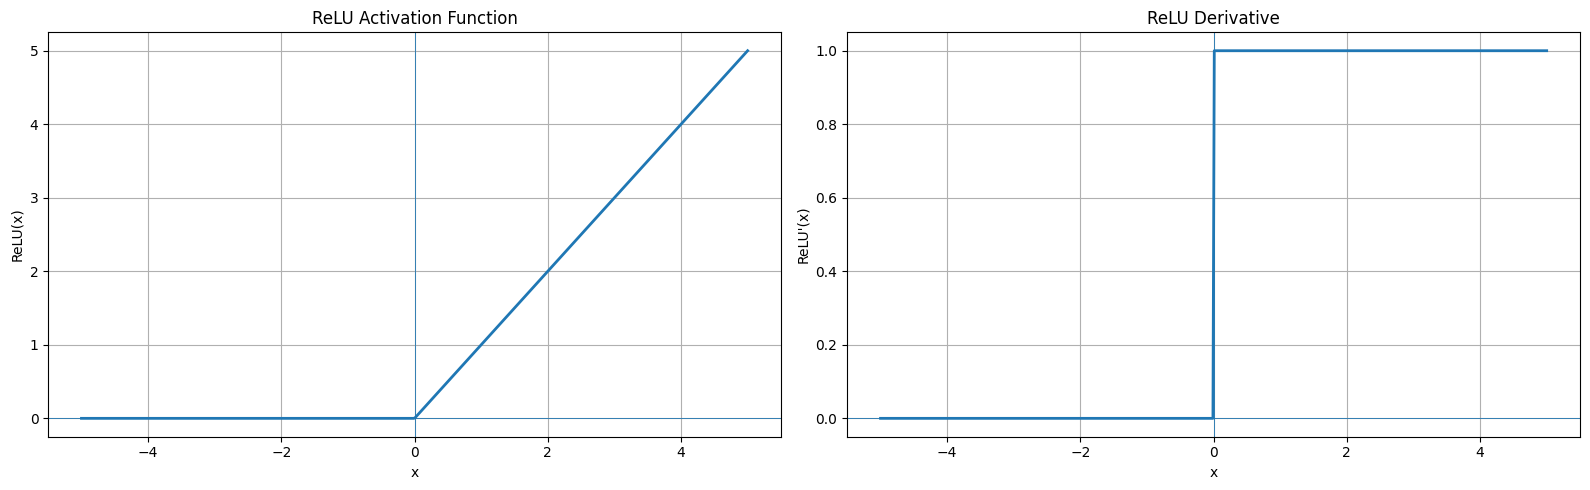

In [11]:
# Create input range
x = np.linspace(-5, 5, 500)
x = torch.tensor(x, dtype=torch.float32)

# Subplots
plt.figure(figsize=(16, 5))

# --- ReLU ---
plt.subplot(1, 2, 1)
plt.plot(x, relu(x), linewidth=2)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.axhline(0, linewidth=0.6)
plt.axvline(0, linewidth=0.6)

# --- Derivative of RelU---
plt.subplot(1, 2, 2)
plt.plot(x, relu_derivative(x), linewidth=2)
plt.title("ReLU Derivative")
plt.xlabel("x")
plt.ylabel("ReLU'(x)")
plt.grid(True)
plt.axhline(0, linewidth=0.6)
plt.axvline(0, linewidth=0.6)

plt.tight_layout()
plt.show()

# **07, Leaky ReLU Formula**

$$
\text{LeakyReLU}(x) =
\begin{cases}
x, & x > 0 \\
\alpha x, & x \le 0
\end{cases}
$$


$$
\text{LeakyReLU}'(x)=
\begin{cases}
1, & x > 0 \\
\alpha, & x \le 0
\end{cases}
$$


In [12]:
# Leaky ReLU Activation function
def leaky_relu_(x, negative_slope=0.01):
    return torch.where(x > 0, x, negative_slope * x)

# Derivative of Leaky ReLU Activation function
def leaky_relu_derivative(x, negative_slope=0.01):
    return torch.where(x > 0, torch.tensor(1.0, dtype=x.dtype),
                                 torch.tensor(negative_slope, dtype=x.dtype))


# using nn Module
leaky_relu_nn = nn.LeakyReLU(negative_slope=0.01 , inplace=False)

# Using F Function
leaky_relu_f = F.leaky_relu(x,negative_slope=0.01, inplace=False)


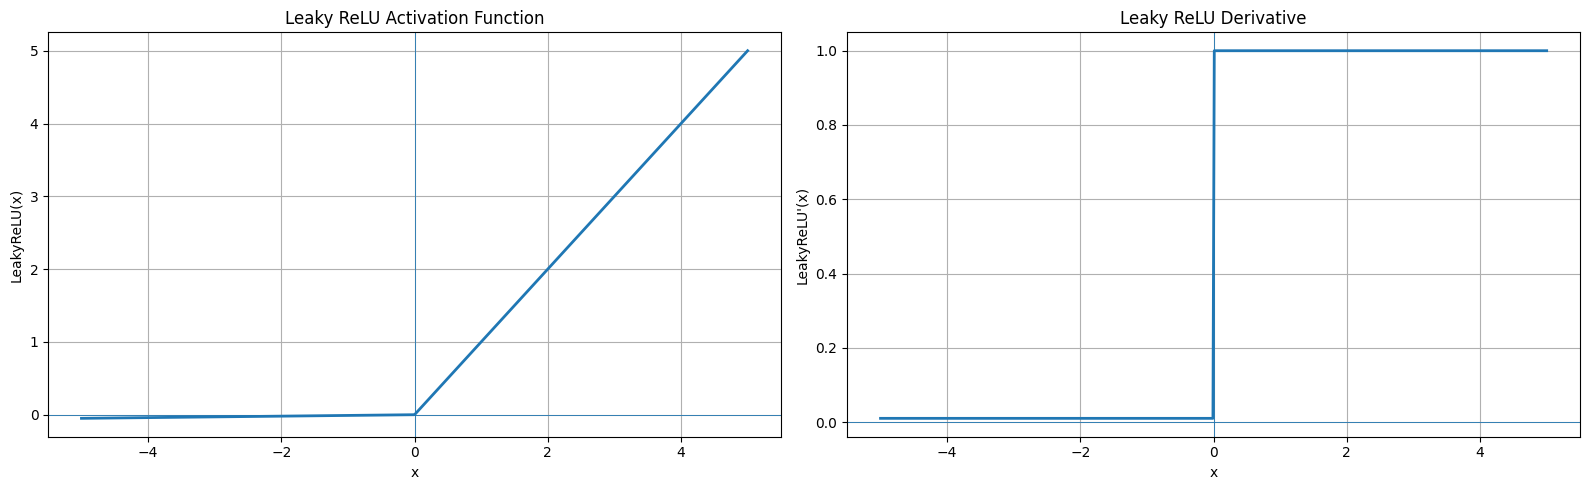

In [13]:
# Create input range
# -----------------------------
x = np.linspace(-5, 5, 500)
x = torch.tensor(x, dtype=torch.float32)

# -----------------------------
# Subplots
# -----------------------------
plt.figure(figsize=(16, 5))

# --- Leaky ReLU ---
plt.subplot(1, 2, 1)
plt.plot(x.numpy(), leaky_relu_(x).numpy(), linewidth=2)
plt.title("Leaky ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("LeakyReLU(x)")
plt.grid(True)
plt.axhline(0, linewidth=0.6)
plt.axvline(0, linewidth=0.6)

# --- Leaky ReLU Derivative ---
plt.subplot(1, 2, 2)
plt.plot(x.numpy(), leaky_relu_derivative(x).numpy(), linewidth=2)
plt.title("Leaky ReLU Derivative")
plt.xlabel("x")
plt.ylabel("LeakyReLU'(x)")
plt.grid(True)
plt.axhline(0, linewidth=0.6)
plt.axvline(0, linewidth=0.6)

plt.tight_layout()
plt.show()

# **08, PReLU (Parametric ReLU)**

$$
\text{PReLU}(x)=
\begin{cases}
x, & x > 0 \\
\alpha x, & x \le 0
\end{cases}
$$

***Where α (alpha) is a learnable parameter, not a fixed constant.***

**PReLU Derivative**
$$
\text{PReLU}'(x)=
\begin{cases}
1, & x > 0 \\
\alpha, & x \le 0
\end{cases}
$$


In [14]:
# PReLU Activation function (manual)
def prelu_(x, alpha=0.25):   # alpha is learnable normally, but here we set a value
    return torch.where(x > 0, x, alpha * x)

# Derivative of PReLU Activation function
def prelu_derivative(x, alpha=0.25):
    return torch.where(
        x > 0,
        torch.tensor(1.0, dtype=x.dtype),
        torch.tensor(alpha, dtype=x.dtype))



# Using nn Module
prelu_nn = nn.PReLU(num_parameters=1, init=0.25)   # alpha = 0.25

# Using F Function
alpha = torch.tensor(0.25)   # slope (must be a tensor)
prelu_f = F.prelu(x, alpha)

# **09, ELU — Exponential Linear Unit**
**Formula of ELU**

$$
\text{ELU}(x)=
\begin{cases}
x, & x > 0 \\
\alpha \left(e^{x} - 1\right), & x \le 0
\end{cases}
$$


**ELU Derivative**
$$
\text{ELU}'(x)=
\begin{cases}
1, & x > 0 \\
\alpha e^{x}, & x \le 0
\end{cases}
$$


In [15]:
# ELU Activation function (manual)
def elu_(x, alpha=1.0):   # alpha controls negative saturation
    return torch.where(x > 0, x, alpha * (torch.exp(x) - 1))

# Derivative of ELU Activation function
def elu_derivative(x, alpha=1.0):
    return torch.where(
        x > 0,
        torch.tensor(1.0, dtype=x.dtype),
        alpha * torch.exp(x)
    )

# Using nn Module
elu_nn = nn.ELU(alpha=1.0, inplace=False)   # default alpha = 1.0

# Using F Function
elu_f = F.elu(x, alpha=1.0, inplace=False)


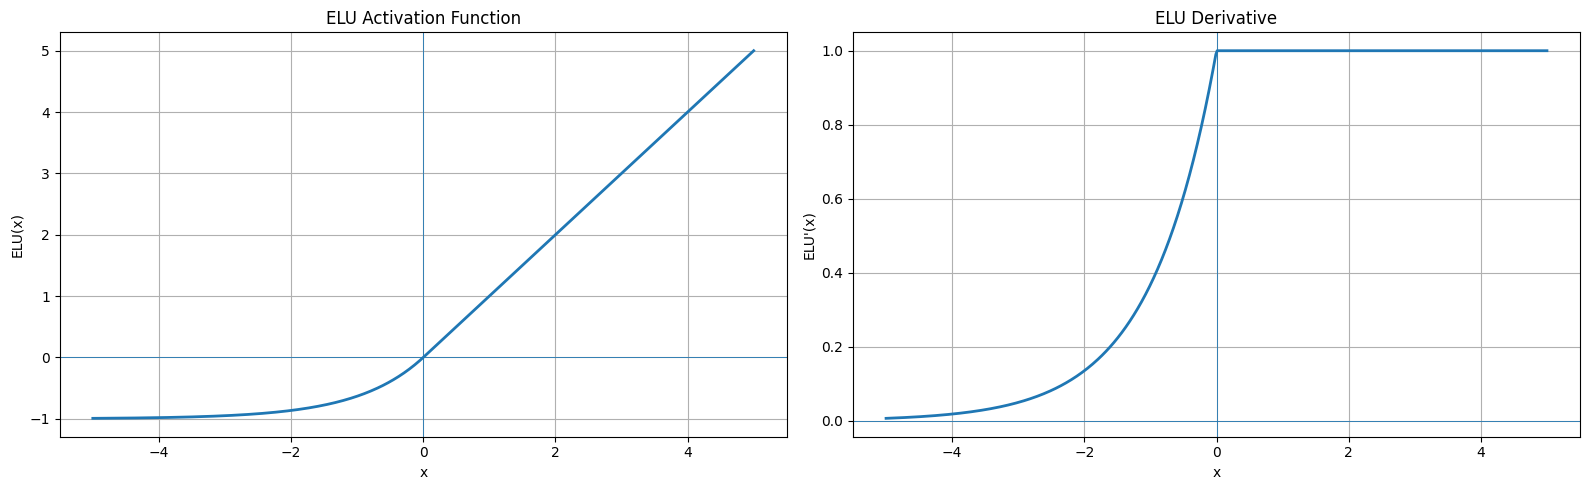

In [16]:
# Create input range
# -----------------------------
x = np.linspace(-5, 5, 500)
x = torch.tensor(x, dtype=torch.float32)

# -----------------------------
# Subplots
# -----------------------------
plt.figure(figsize=(16, 5))

# --- ELU ---
plt.subplot(1, 2, 1)
plt.plot(x.numpy(), elu_(x).numpy(), linewidth=2)
plt.title("ELU Activation Function")
plt.xlabel("x")
plt.ylabel("ELU(x)")
plt.grid(True)
plt.axhline(0, linewidth=0.6)
plt.axvline(0, linewidth=0.6)

# --- ELU Derivative ---
plt.subplot(1, 2, 2)
plt.plot(x.numpy(), elu_derivative(x).numpy(), linewidth=2)
plt.title("ELU Derivative")
plt.xlabel("x")
plt.ylabel("ELU'(x)")
plt.grid(True)
plt.axhline(0, linewidth=0.6)
plt.axvline(0, linewidth=0.6)

plt.tight_layout()
plt.show()


# **10, Scaled Exponential Linear Unit (SELU)**

**Formula of SELU**

$$
\text{SELU}(x)=
\lambda \begin{cases}
x, & x > 0 \\
\alpha \left(e^{x} - 1\right), & x \le 0
\end{cases}
$$

**Derivative of SELU**

$$
\text{SELU}'(x)=
\lambda \begin{cases}
1, & x > 0 \\
\alpha e^{x}, & x \le 0
\end{cases}
$$



In [17]:
# SELU constants
alpha = 1.6732632423543772
lambda_ = 1.0507009873554805

# SELU activation (manual)
def selu_(x):
    return torch.where(x > 0,
                       lambda_ * x,
                       lambda_ * alpha * (torch.exp(x) - 1))

# SELU derivative (manual)
def selu_derivative(x):
    return torch.where(x > 0,
                       torch.tensor(lambda_, dtype=x.dtype),
                       torch.tensor(lambda_ * alpha, dtype=x.dtype) * torch.exp(x))


# Using nn Module
selu_nn = nn.SELU()

# Using F Function
selu_f = F.selu(x)



# **11, Swish Activation Function**

**Scaled Swish Activation Function**

$$
\text{Swish}_\beta(x) = x \cdot \frac{1}{1 + e^{-\beta x}}
$$

**Derivative of Scaled Swish**

$$
\text{Swish}_\beta'(x) = \frac{1}{1 + e^{-\beta x}} + \beta x \cdot \frac{1}{1 + e^{-\beta x}} \left( 1 - \frac{1}{1 + e^{-\beta x}} \right)
$$



In [18]:
# Swish Activation Function
def swish_(x, beta= 1.5):
    return x * torch.sigmoid(x * beta)

# Derivative of Swish Activation Function
def swish_derivative(x, beta= 1.5):
    sig = torch.sigmoid(x * beta)
    return sig + (beta * x) * sig * (1 - sig)




# **12, Softplus Activation Function**

$$
\text{Softplus}(x) = \log(1 + e^x)
$$

**Derivative of Softplus**

$$
\text{Softplus}'(x) = \frac{1}{1 + e^{-x}} = \sigma(x)
$$


In [19]:
# Softplus Activation Function
def softplus_(x):
    return torch.log(1 + torch.exp(x))

# Derivative of Softplus Activation Function
def softplus_derivative(x):
    return torch.sigmoid(x)

# Using nn Module
softplus_nn = nn.Softplus(beta = 1.8, threshold=15)

# Using F Function
softplus_f = F.softplus(x , beta=1.6,  threshold=13)



# **13, Mish Activation Function**

$$
\text{Mish}(x) = x \cdot \tanh(\log(1 + e^x))
$$

**Derivative of Mish**

$$
\text{Mish}'(x) = \tanh(\log(1 + e^x)) + x \cdot \text{sech}^2(\log(1 + e^x)) \cdot \frac{1}{1 + e^{-x}}
$$


In [20]:
# Mish Activation Function
def mish_(x):
    return x * torch.tanh(torch.nn.functional.softplus(x))

In [21]:
# using nn module
mish_nn = nn.Mish(inplace=False)

In [22]:
import torch
import torch.nn.functional as F
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# Input range
# -----------------------------
x = torch.linspace(-5, 5, 500)

# -----------------------------
# Activation functions
# -----------------------------
linear = x
relu = F.relu(x)
negative_slope = 0.01
leaky_relu = torch.where(x > 0, x, negative_slope * x)
alpha = 1.0
elu = torch.where(x > 0, x, alpha * (torch.exp(x) - 1))
alpha_selu = 1.6733
lambda_selu = 1.0507
selu = lambda_selu * torch.where(x > 0, x, alpha_selu * (torch.exp(x) - 1))
sigmoid = torch.sigmoid(x)
tanh = torch.tanh(x)
softplus = F.softplus(x)
beta_swish = 1.0
swish = x * torch.sigmoid(beta_swish * x)
mish = x * torch.tanh(F.softplus(x))

activations = [linear, relu, leaky_relu, elu, selu, sigmoid, tanh, softplus, swish, mish]
names = ["Linear", "ReLU", "Leaky ReLU", "ELU", "SELU", "Sigmoid", "Tanh", "Softplus", "Swish", "Mish"]

# -----------------------------
# Create subplots
# -----------------------------
fig = make_subplots(rows=2, cols=5, subplot_titles=names)

for i, (act, name) in enumerate(zip(activations, names)):
    row = i // 5 + 1
    col = i % 5 + 1
    fig.add_trace(
        go.Scatter(x=x.numpy(), y=act.numpy(), mode='lines', name=name),
        row=row, col=col
    )
    # Add horizontal and vertical lines
    fig.add_shape(type="line", x0=-5, x1=5, y0=0, y1=0, line=dict(color="black", width=0.6), row=row, col=col)
    fig.add_shape(type="line", x0=0, x1=0, y0=float(act.min()), y1=float(act.max()), line=dict(color="black", width=0.6), row=row, col=col)

# -----------------------------
# Layout
# -----------------------------
fig.update_layout(
    height=600, width=1500,
    title_text="Activation Functions",
    showlegend=False,
    template="plotly_white"
)

fig.show()
